# **Flight Fare Prediction**

**Import the libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# **Import the Train Data**

Load the dataset

In [2]:
df = pd.read_excel("/content/drive/MyDrive/Data_Train.xlsx")

# **Data Preprocessing**

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.shape

(10683, 11)

In [5]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [6]:
df.dropna(inplace=True)

We drop the data because the null values are some and we have huge data

In [7]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [8]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
time_columns = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration']

for column in time_columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} unique values")

Date_of_Journey: 44 unique values
Dep_Time: 222 unique values
Arrival_Time: 1343 unique values
Duration: 368 unique values


In [10]:
time_columns = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration']


for column in time_columns:
    unique = df[column].unique()
    print(f"{column}: {unique} unique values")
    print('')


Date_of_Journey: ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019'] unique values

Dep_Time: ['22:20' '05:50' '09:25' '18:05' '16:50' '09:00' '18:55' '08:00' '08:55'
 '11:25' '09:45' '20:20' '11:40' '21:10' '17:15' '16:40' '08:45' '14:00'
 '20:15' '16:00' '14:10' '22:00' '04:00' '21:25' '21:50' '07:00' '07:05'
 '09:50' '14:35' '10:35' '15:05' '14:15' '06:45' '20:55' '11:10' '05:45'
 '19:00' '23:05' '11:00' '09:35' '21:15' '23:55' '19:45' '08:50' '15:40'
 '06:05' '15:00' '13:55' '0

As we know that our model only understand the int/Numeric values so for these columns (Date_of_Journey |	Dep_Time |	Arrival_Time) we extract our require things in a form of int like months, days, min, hours, years

In [11]:
# Add new feature Journey Day and Extract the Days
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day

# Add new feature Journey Month and Extract the Months
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month

# Add new feature Journey Year and Extract the Years
df['Journey_Year'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.year

In [12]:
df.drop(columns=['Date_of_Journey'], axis = 1, inplace=True)

In [13]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [14]:
# Departure Time is that time where our Plane is Fly from Airport

# Add new Dep_min and extract the Hour
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

# Add new Dep_min and extract the Minutes
df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute

# Drop the Dep_Time
df.drop(columns=['Dep_Time'], axis = 1, inplace=True)

<ipython-input-14-e40ad0e96928>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
<ipython-input-14-e40ad0e96928>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute


In [15]:
df.tail()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,2019,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,19:15,8h 20m,2 stops,No info,11753,9,5,2019,10,55


In [16]:
# Arival time is time where the plane is land to there destination


# Add new Arrival_Hour and extract the Hour
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

# Add new Dep_min and extract the Minutes
df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

# Drop the Arrival_Time
df.drop(columns=['Arrival_Time'], axis = 1, inplace=True)

<ipython-input-16-6ad1ba3aa432>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
<ipython-input-16-6ad1ba3aa432>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute


In [17]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


Now there is a problem in a Duration Column that with hour and min values we two additional components h and m

In [18]:
# Convrt the duration column into int

Duration = list(df['Duration'])

for i in range(len(Duration)):
    if len(Duration[i].split()) != 2:
        if 'h' in Duration[i]:
            Duration[i] = Duration[i].strip() + ' 0m'
        elif 'm' in Duration[i]:
            Duration[i] = '0h ' + Duration[i].strip()

Duration_Hours = []
Duration_Min = []

# Parse hours and minutes
for i in range(len(Duration)):
    # Extract hours
    hours = int(Duration[i].split('h')[0].strip())
    Duration_Hours.append(hours)

    # Extract minutes
    minutes_part = Duration[i].split('h')[1].strip()  # Get the part after 'h'
    minutes = int(minutes_part.split('m')[0].strip())  # Extract the number before 'm'
    Duration_Min.append(minutes)

# Add new features for hours and minutes
df['Duration_Hour'] = Duration_Hours
df['Duration_Min'] = Duration_Min

# Drop the original 'Duration' column
df.drop(columns=['Duration'], axis=1, inplace=True)


In [19]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


# **Data Analaysis**

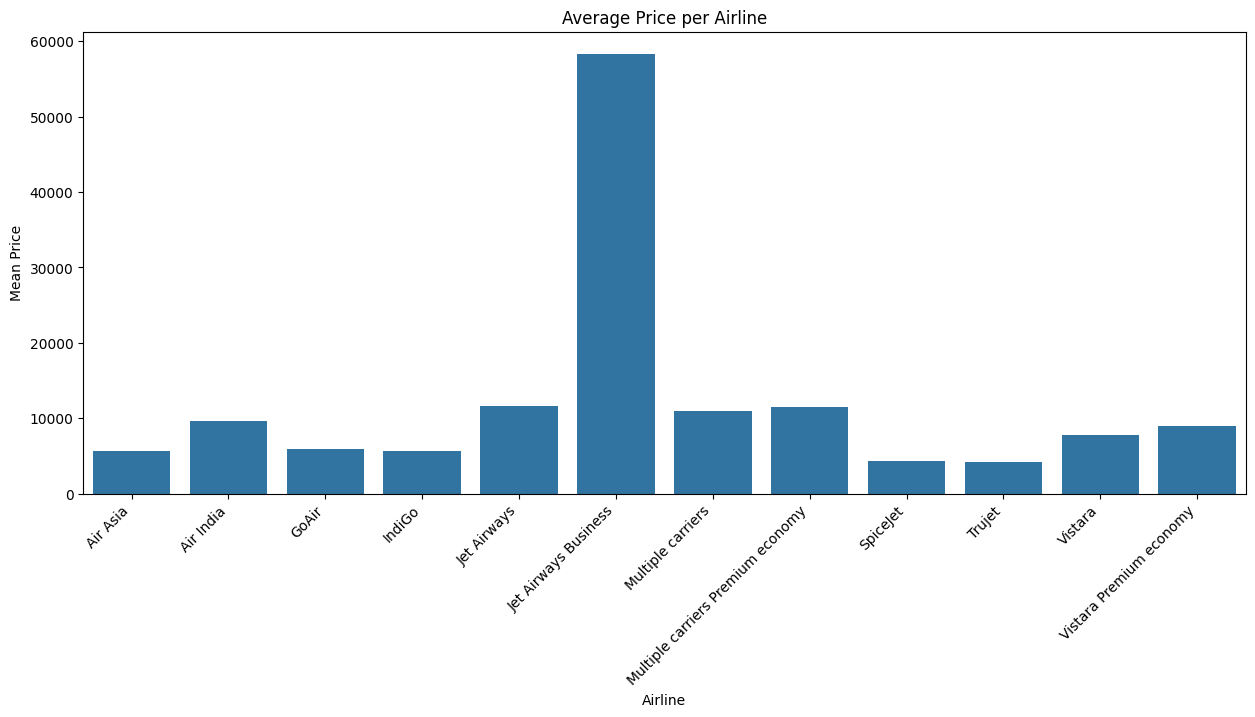

In [20]:
# Group data by airline and calculate the mean price for each airline
airline_prices = df.groupby('Airline')['Price'].mean().reset_index()

# Create a bar plot to visualize the relationship between airline and price
plt.figure(figsize=(15, 6))
sns.barplot(x='Airline', y='Price', data=airline_prices)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Airline')
plt.ylabel('Mean Price')
plt.title('Average Price per Airline')
plt.show()

As you can see that the Jet Airways Business had high price and all other Airways price are almost same

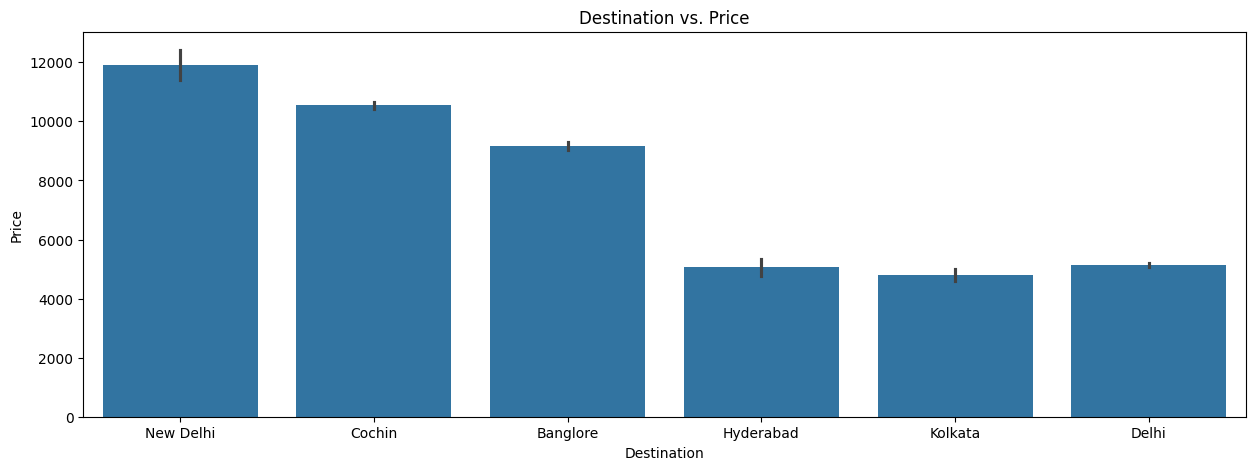

In [21]:
# Analyze the relationship between Destination and Price
plt.figure(figsize=(15, 5))
sns.barplot(x='Destination', y='Price', data=df.sort_values('Price', ascending=False))
plt.title('Destination vs. Price')
plt.show()

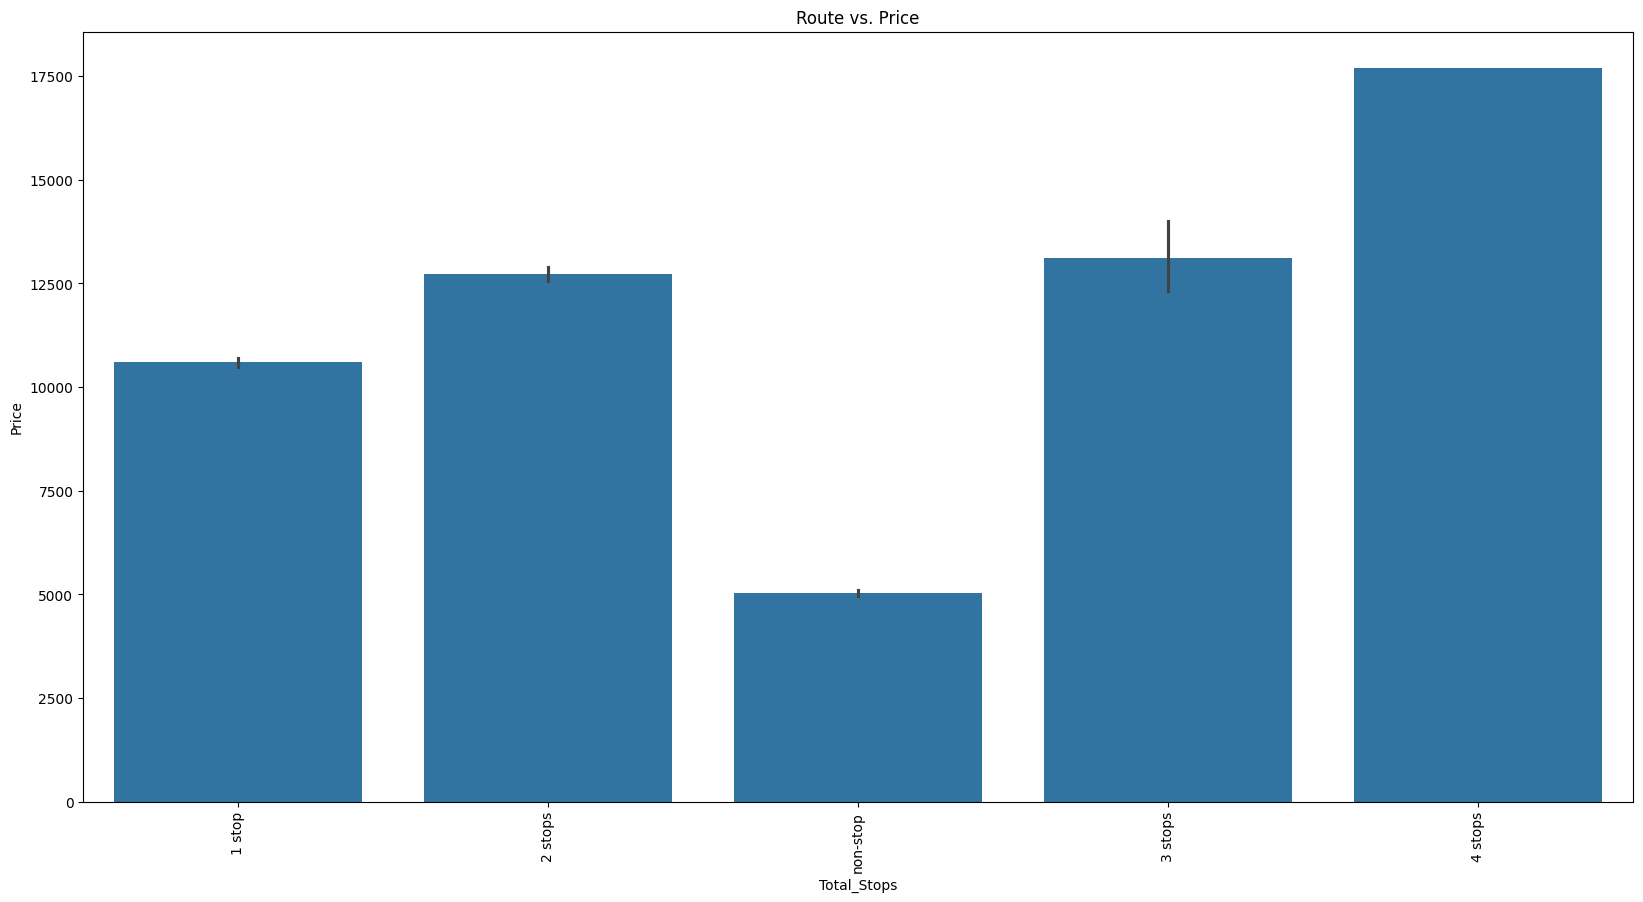

In [22]:
# Analyze the relationship between Price and Route
plt.figure(figsize=(20, 10))
sns.barplot(x='Total_Stops', y='Price', data=df.sort_values('Price', ascending=False))
plt.xticks(rotation=90)
plt.title('Route vs. Price')
plt.show()

With this Relation we can Analyze that, Increasing in a stops will increasing the Price

# **Feature Enginering**

**Encoding the Categorical Features**

In [23]:
#Use One_Hot_Ebcoding for a Nominal data

df = pd.get_dummies(df, columns=["Airline", "Source", "Destination"], drop_first=True)

In [24]:
df.head()

,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,...,False,False,False,False,False,False,False,False,False,True
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,...,False,False,False,True,False,False,False,False,False,False
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,...,False,False,True,False,False,True,False,False,False,False
3,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,...,False,False,False,True,False,False,False,False,False,False
4,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,...,False,False,False,False,False,False,False,False,False,True


In [25]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [26]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8344
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In "Adiituonal_Info" Columns there is almost 80% of data is No info so don't need that in our dataset

In [27]:
df.drop(columns=['Additional_Info'], axis=1, inplace=True)

As you Analyze the Data the "Total_Stops" Column  is same as "Route" so we Drop the "Route" Column and we Encode the "Total_stops" Column

In [28]:
df.drop(columns=['Route'], axis=1, inplace=True)

Total_Stops has Ordinal Data so we Perform the Label Encoding on that

In [29]:
# Import the library from the Sklearn to perform the label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Total_Stops'] = le.fit_transform(df['Total_Stops'])

In [30]:
df.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,2019,22,20,1,10,2,...,False,False,False,False,False,False,False,False,False,True
1,1,7662,1,5,2019,5,50,13,15,7,...,False,False,False,True,False,False,False,False,False,False
2,1,13882,9,6,2019,9,25,4,25,19,...,False,False,True,False,False,True,False,False,False,False
3,0,6218,12,5,2019,18,5,23,30,5,...,False,False,False,True,False,False,False,False,False,False
4,0,13302,1,3,2019,16,50,21,35,4,...,False,False,False,False,False,False,False,False,False,True


In [31]:
train_data = df

In [32]:
train_data.shape

(10682, 31)

In [33]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Journey_Year',
       'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hour',
       'Duration_Min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [34]:
train_data

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,2019,22,20,1,10,2,...,False,False,False,False,False,False,False,False,False,True
1,1,7662,1,5,2019,5,50,13,15,7,...,False,False,False,True,False,False,False,False,False,False
2,1,13882,9,6,2019,9,25,4,25,19,...,False,False,True,False,False,True,False,False,False,False
3,0,6218,12,5,2019,18,5,23,30,5,...,False,False,False,True,False,False,False,False,False,False
4,0,13302,1,3,2019,16,50,21,35,4,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,4107,9,4,2019,19,55,22,25,2,...,False,False,False,True,False,False,False,False,False,False
10679,4,4145,27,4,2019,20,45,23,20,2,...,False,False,False,True,False,False,False,False,False,False
10680,4,7229,27,4,2019,8,20,11,20,3,...,False,False,False,False,False,False,True,False,False,False
10681,4,12648,1,3,2019,11,30,14,10,2,...,False,False,False,False,False,False,False,False,False,True


# **Import the Test Data**

In [35]:
df = df = pd.read_excel("/content/drive/MyDrive/Test_set.xlsx")

In [36]:
df.shape

(2671, 10)

In [37]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [39]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [40]:
# Add new feature Journey Day and Extract the Days
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day

# Add new feature Journey Month and Extract the Months
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month

# Add new feature Journey Year and Extract the Years
df['Journey_Year'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.year

df.drop(columns=['Date_of_Journey'], axis = 1, inplace=True)

In [41]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019


In [42]:
# Departure Time is that time where our Plane is Fly from Airport

# Add new Dep_min and extract the Hour
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

# Add new Dep_min and extract the Minutes
df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute

# Drop the Dep_Time
df.drop(columns=['Dep_Time'], axis = 1, inplace=True)

<ipython-input-42-e40ad0e96928>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
<ipython-input-42-e40ad0e96928>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute


In [43]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,2019,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,2019,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019,23,55


In [44]:
# Arival time is time where the plane is land to there destination


# Add new Arrival_Hour and extract the Hour
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

# Add new Dep_min and extract the Minutes
df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

# Drop the Arrival_Time
df.drop(columns=['Arrival_Time'], axis = 1, inplace=True)

<ipython-input-44-6ad1ba3aa432>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
<ipython-input-44-6ad1ba3aa432>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute


In [45]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,2019,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,2019,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2019,23,55,2,45


In [46]:
# Convrt the duration column into int

Duration = list(df['Duration'])

for i in range(len(Duration)):
    if len(Duration[i].split()) != 2:
        if 'h' in Duration[i]:
            Duration[i] = Duration[i].strip() + ' 0m'
        elif 'm' in Duration[i]:
            Duration[i] = '0h ' + Duration[i].strip()

Duration_Hours = []
Duration_Min = []

# Parse hours and minutes
for i in range(len(Duration)):
    # Extract hours
    hours = int(Duration[i].split('h')[0].strip())
    Duration_Hours.append(hours)

    # Extract minutes
    minutes_part = Duration[i].split('h')[1].strip()  # Get the part after 'h'
    minutes = int(minutes_part.split('m')[0].strip())  # Extract the number before 'm'
    Duration_Min.append(minutes)

# Add new features for hours and minutes
df['Duration_Hour'] = Duration_Hours
df['Duration_Min'] = Duration_Min

# Drop the original 'Duration' column
df.drop(columns=['Duration'], axis=1, inplace=True)


In [47]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2019,23,55,2,45,2,50


In [48]:
#Use One_Hot_Ebcoding for a Nominal data

df = pd.get_dummies(df, columns=["Airline", "Source", "Destination"], drop_first=True)

In [49]:
df.head()

,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,DEL → BOM → COK,1 stop,No info,6,6,2019,17,30,4,25,...,False,False,True,False,False,True,False,False,False,False
1,CCU → MAA → BLR,1 stop,No info,12,5,2019,6,20,10,20,...,False,False,False,True,False,False,False,False,False,False
2,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,...,False,False,True,False,False,True,False,False,False,False
3,DEL → BOM → COK,1 stop,No info,21,5,2019,8,0,21,0,...,False,False,True,False,False,True,False,False,False,False
4,BLR → DEL,non-stop,No info,24,6,2019,23,55,2,45,...,False,False,False,False,False,False,True,False,False,False


In [50]:
df.drop(columns=['Route','Additional_Info'], axis=1, inplace=True)

In [51]:
# Import the library from the Sklearn to perform the label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Total_Stops'] = le.fit_transform(df['Total_Stops'])

In [52]:
df.head()

,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,6,6,2019,17,30,4,25,10,55,...,False,False,True,False,False,True,False,False,False,False
1,0,12,5,2019,6,20,10,20,4,0,...,False,False,False,True,False,False,False,False,False,False
2,0,21,5,2019,19,15,19,0,23,45,...,False,False,True,False,False,True,False,False,False,False
3,0,21,5,2019,8,0,21,0,13,0,...,False,False,True,False,False,True,False,False,False,False
4,4,24,6,2019,23,55,2,45,2,50,...,False,False,False,False,False,False,True,False,False,False


In [53]:
test_data = df

In [54]:
test_data.shape

(2671, 29)

In [55]:
test_data.columns

Index(['Total_Stops', 'Journey_Day', 'Journey_Month', 'Journey_Year',
       'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hour',
       'Duration_Min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

# **Find Correlation**

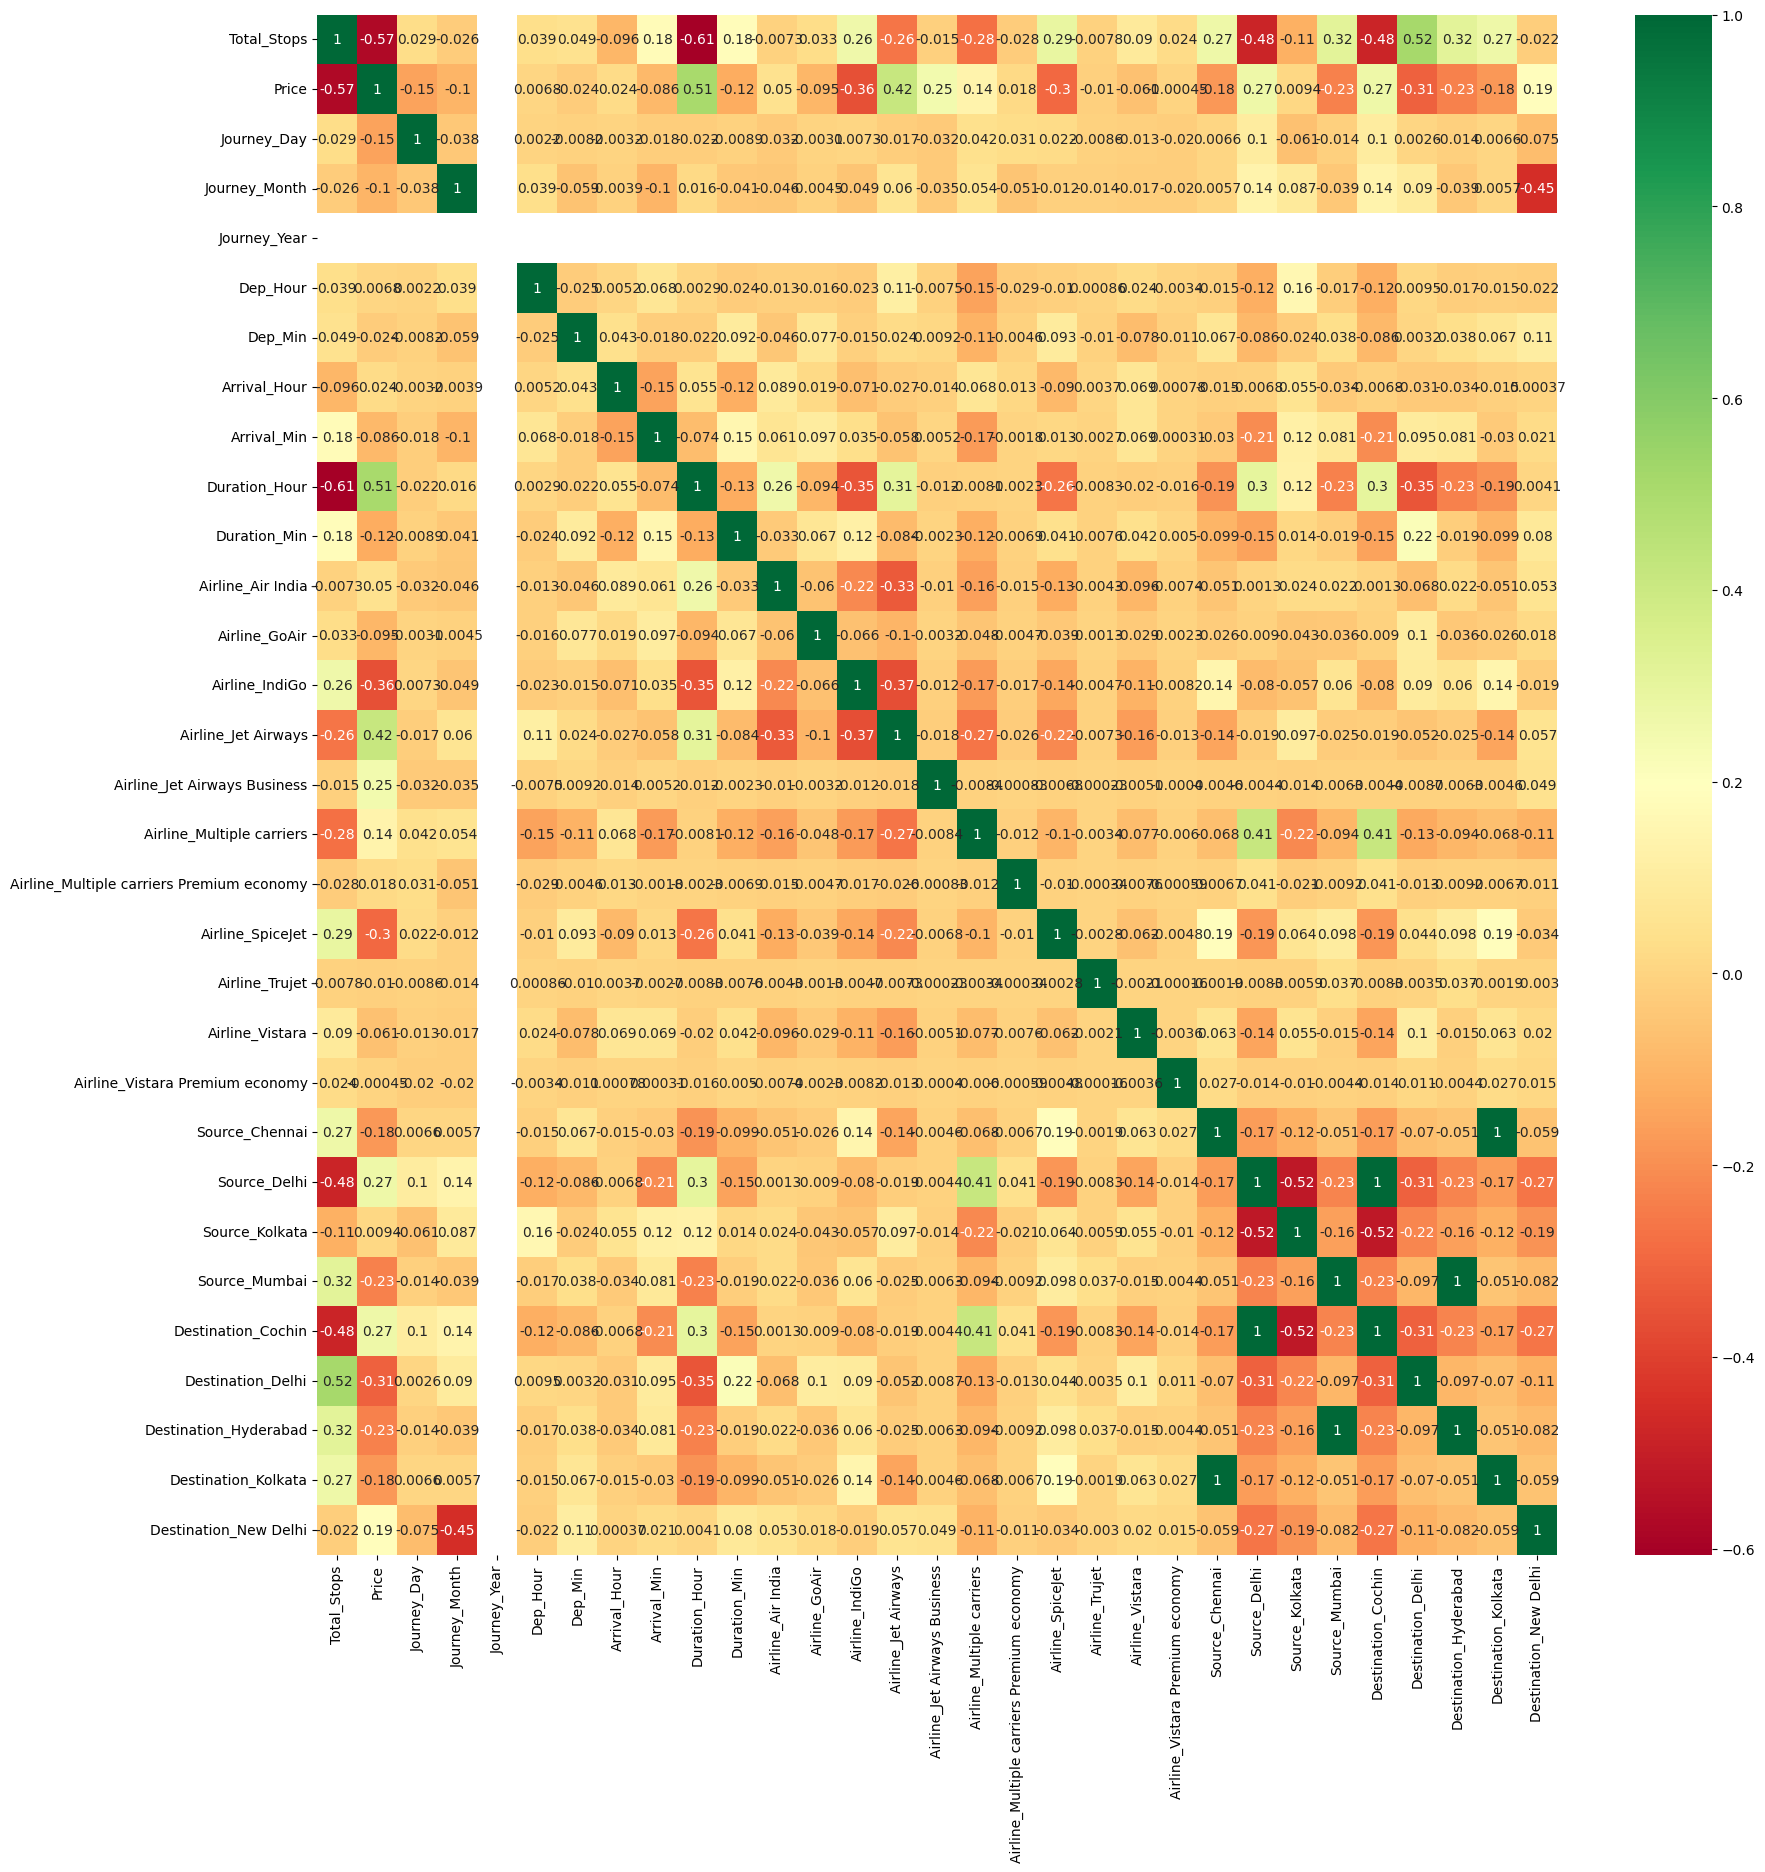

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn')
plt.show()

# **Feature Selection**

In [57]:
X = train_data.drop(columns=['Price'], axis=1)
Y = train_data['Price']

In [58]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,24,3,2019,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,1,1,5,2019,5,50,13,15,7,25,...,False,False,False,True,False,False,False,False,False,False
2,1,9,6,2019,9,25,4,25,19,0,...,False,False,True,False,False,True,False,False,False,False
3,0,12,5,2019,18,5,23,30,5,25,...,False,False,False,True,False,False,False,False,False,False
4,0,1,3,2019,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True


In [59]:
Y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


# **Important Features**

In [60]:
# import the library from sklearn to find the important features

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

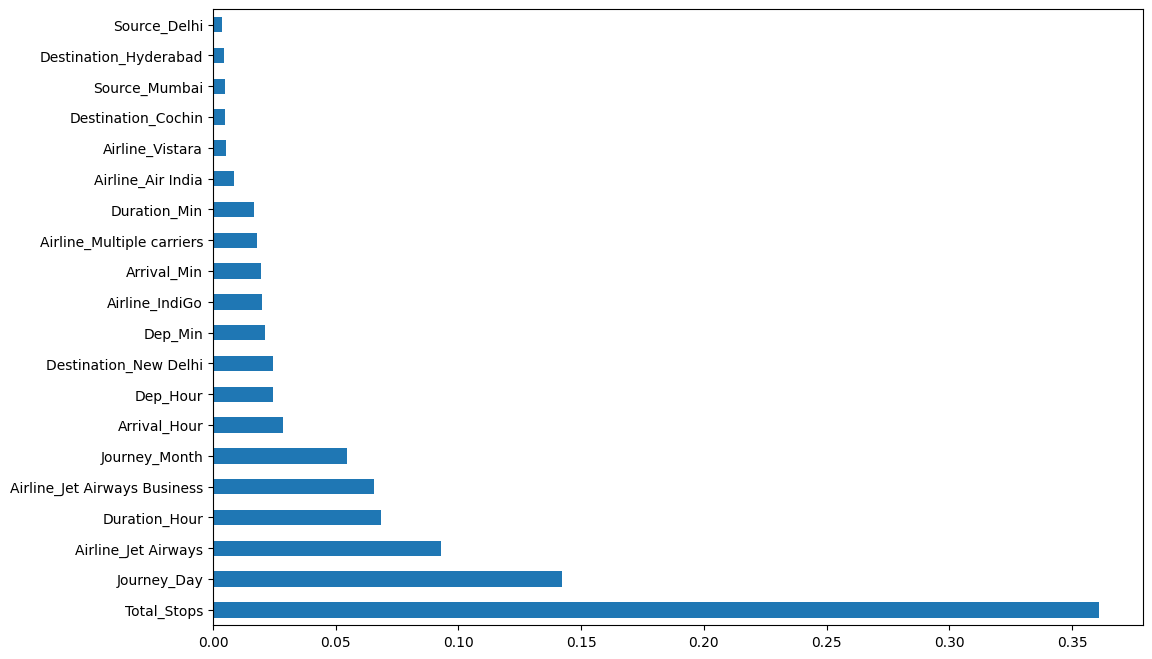

In [61]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

"Total_Stops" are playing the most important role in this dataset, it tells us that "Total_stops" are highly correlated with our Predicted feature 'Price'

# **Train / Test Split**

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [63]:
X_train.shape, X_test.shape

((8545, 30), (2137, 30))

In [64]:
Y_train.shape, Y_test.shape

((8545,), (2137,))

# **Scaling**

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Fit the Model using Random Forest**

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [67]:
y_pred = rf_model.predict(X_test)

In [68]:
rf_model.score(X_train, Y_train)

0.9533897388621795

In [69]:
rf_model.score(X_test, Y_test)

0.7976305706709127

In [70]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))

MAE: 1176.0614327042867
MSE: 4363501.033482258


In [71]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

0.7976305706709127

# **HyperTuning**

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
}

grid_rf_regressor = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_rf_regressor.fit(X_train, Y_train)

print("Best Parameters for Random Forest Regressor:", grid_rf_regressor.best_params_)

# Use the best estimator to make predictions
y_pred_rf_regressor_tuned = grid_rf_regressor.best_estimator_.predict(X_test)

Best Parameters for Random Forest Regressor: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 500}


In [74]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with hyperparameters
FlightFare_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    max_features='sqrt',
    min_samples_split=5,
    random_state=42
)

# Fit the model to the training data
FlightFare_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=5,
                      n_estimators=500, random_state=42)

In [75]:
y_rf = FlightFare_model.predict(X_test)

In [76]:
r2_score(Y_test, y_rf)

0.8282798117167027

# **Save the Model**

In [79]:
import joblib

# Save the trained model to a file
joblib.dump(FlightFare_model, 'FlightFare_model.pkl')

['FlightFare_model.pkl']

**Save in Drive**

In [80]:
joblib.dump(FlightFare_model, '/content/drive/My Drive/FlightFare_model.pkl')

['/content/drive/My Drive/FlightFare_model.pkl']